In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import cartopy
import cartopy.crs as ccrs
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
case = "fanv3clm2000"
path = "/glade/scratch/jinmuluo/archive/" + case + "/lnd/hist/" 
h = 'h4'
start_date = date(2000, 1, 1)
end_date = date(2000, 12, 1)
delta = end_date - start_date
fanCLM = []
for i in range(delta.days//30 + 1):
    month = start_date + relativedelta(months=i)
    month = month.strftime('%Y-%m')
    fanCLM.append(path + "fanv3_debugging" + ".clm2." + h + "." + month +".nc")
print(len(fanCLM), fanCLM[-1])

12 /glade/scratch/jinmuluo/archive/fanv3clm2000/lnd/hist/fanv3_debugging.clm2.h4.2000-12.nc


In [4]:
dsCLM = xr.open_mfdataset(fanCLM, decode_times=True)
dsCLM

<xarray.Dataset>
Dimensions:                     (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25, time: 12, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * levgrnd                     (levgrnd) float32 0.01 0.04 0.09 ... 28.87 42.0
  * levsoi                      (levsoi) float32 0.01 0.04 0.09 ... 6.94 8.03
  * levlak                      (levlak) float32 0.05 0.6 2.1 ... 34.33 44.78
  * levdcmp                     (levdcmp) float32 0.01 0.04 0.09 ... 28.87 42.0
  * time                        (time) datetime64[ns] 2000-02-01 ... 2001-01-01
  * lon                         (lon) float32 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * lat                         (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables: (12/19)
    mcdate                      (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                       (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds                 (time, hist_interval) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...                          ...
    FMAX_DENIT_CARBONSUBSTRATE  (time, levdcmp, lat, lon) float32 dask.array<chunksize=(1, 25, 96, 144), meta=np.ndarray>
    SMIN_NO3                    (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    anaerobic_frac              (time, levdcmp, lat, lon) float32 dask.array<chunksize=(1, 25, 96, 144), meta=np.ndarray>
    diffus                      (time, levdcmp, lat, lon) float32 dask.array<chunksize=(1, 25, 96, 144), meta=np.ndarray>
    fr_WFPS                     (time, levdcmp, lat, lon) float32 dask.array<chunksize=(1, 25, 96, 144), meta=np.ndarray>
    soil_co2_prod               (time, levdcmp, lat, lon) float32 dask.array<chunksize=(1, 25, 96, 144), meta=np.ndarray>
Attributes: (12/101)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 03/08/23 07:51:41
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    Time_constant_3Dvars_filename:        ./fanv3_debugging.clm2.h0.2000-01.nc
    Time_constant_3Dvars:                 ZSOI:DZSOI:WATSAT:SUCSAT:BSW:HKSAT:...

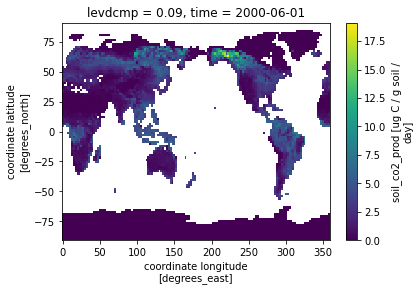

In [5]:
dsCLM['soil_co2_prod'].sel(time='2000-06-01', levdcmp=0.09).plot()

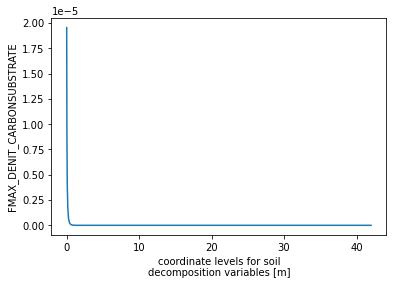

In [6]:
co2 = dsCLM['FMAX_DENIT_CARBONSUBSTRATE'].mean(dim=['time', 'lat', 'lon'])
co2.plot()

In [7]:
co2.values

array([1.9542014e-05, 8.9866944e-06, 3.9977836e-06, 1.7806638e-06,
       6.7867813e-07, 2.3610308e-07, 7.6007034e-08, 2.3441821e-08,
       6.4085897e-09, 1.6437313e-09, 5.1973142e-10, 2.1101133e-10,
       1.2015924e-10, 2.6305166e-11, 3.1752573e-11, 1.7326786e-11,
       1.9131679e-11, 6.2023368e-12, 3.6295548e-12, 1.9057768e-12,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

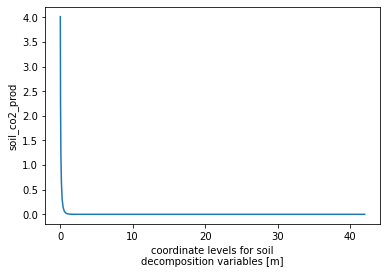

In [8]:
co2 = dsCLM['soil_co2_prod'].mean(dim=['time', 'lat', 'lon'])
co2.plot()

In [9]:
co2.values

array([4.01236629e+00, 2.23345065e+00, 1.19771659e+00, 6.42901003e-01,
       3.06412041e-01, 1.35784253e-01, 5.60041070e-02, 2.19957978e-02,
       7.90045224e-03, 2.69096880e-03, 9.86557221e-04, 3.99975310e-04,
       2.08308076e-04, 6.41557708e-05, 8.15513777e-05, 4.60016199e-05,
       5.69165750e-05, 1.70032399e-05, 1.00652105e-05, 5.93665754e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00], dtype=float32)